#**Assignment-2**
**Subject: Data Mining**

**Please follow the steps below to complete your assignment:**

1. You need to download “Wine” data from the kaggle; ref is given below. [2]
2. Follow assignment-1 steps 2 to 5 to perform data processing and write inferences. [3]
3. Perform at least five clustering methods with varying cluster sizes. Find correct cluster numbers for each method and show with line plot; how you finalized this cluster number. [5]
4. Compare all the clustering methods, and write how you compared, what method you used and why? [5]
5. Do steps 3 and 4 again after dimension reduction, and show whether it is helpful; if not, why? [5]

**Ref**: 
1. https://www.kaggle.com/harrywang/wine-dataset-for-clustering

**Importing Packages and Loading Data**

In [ ]:
import pandas as pd # Import Pandas for data manipulation using dataframes
import seaborn as sns # Statistical data visualization
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import numpy as np # Import Numpy for data statistical analysis 
from sklearn.svm import SVC 
from sklearn import metrics
from sklearn.model_selection import train_test_split,ShuffleSplit
import warnings
warnings.filterwarnings('ignore')

#import visuals.py 
#import visuals as vp
#import properties_1 as ps
sns.set_style('whitegrid')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from itertools import chain

**Loading Dataset**

In [ ]:
df = pd.read_csv("/content/wine-clustering.csv")
df.head() ################ first 5 records

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df.tail() ############### last 5 records

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [ ]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
df.shape

(178, 13)

**Follow assignment-1 steps 2 to 5 to perform data processing and write inferences.**

**Assignment 1 : 2. Remove the missing/infinite values using the mean strategy if required**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


**Finding Null Values**

In [ ]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [ ]:
df.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


**Assignment 1 : 3. Visualize the data in 2-D scatter plot and write the inferences, How the data look like. [5]**

**Ploting all the scatter matrix pairs in a single plot**

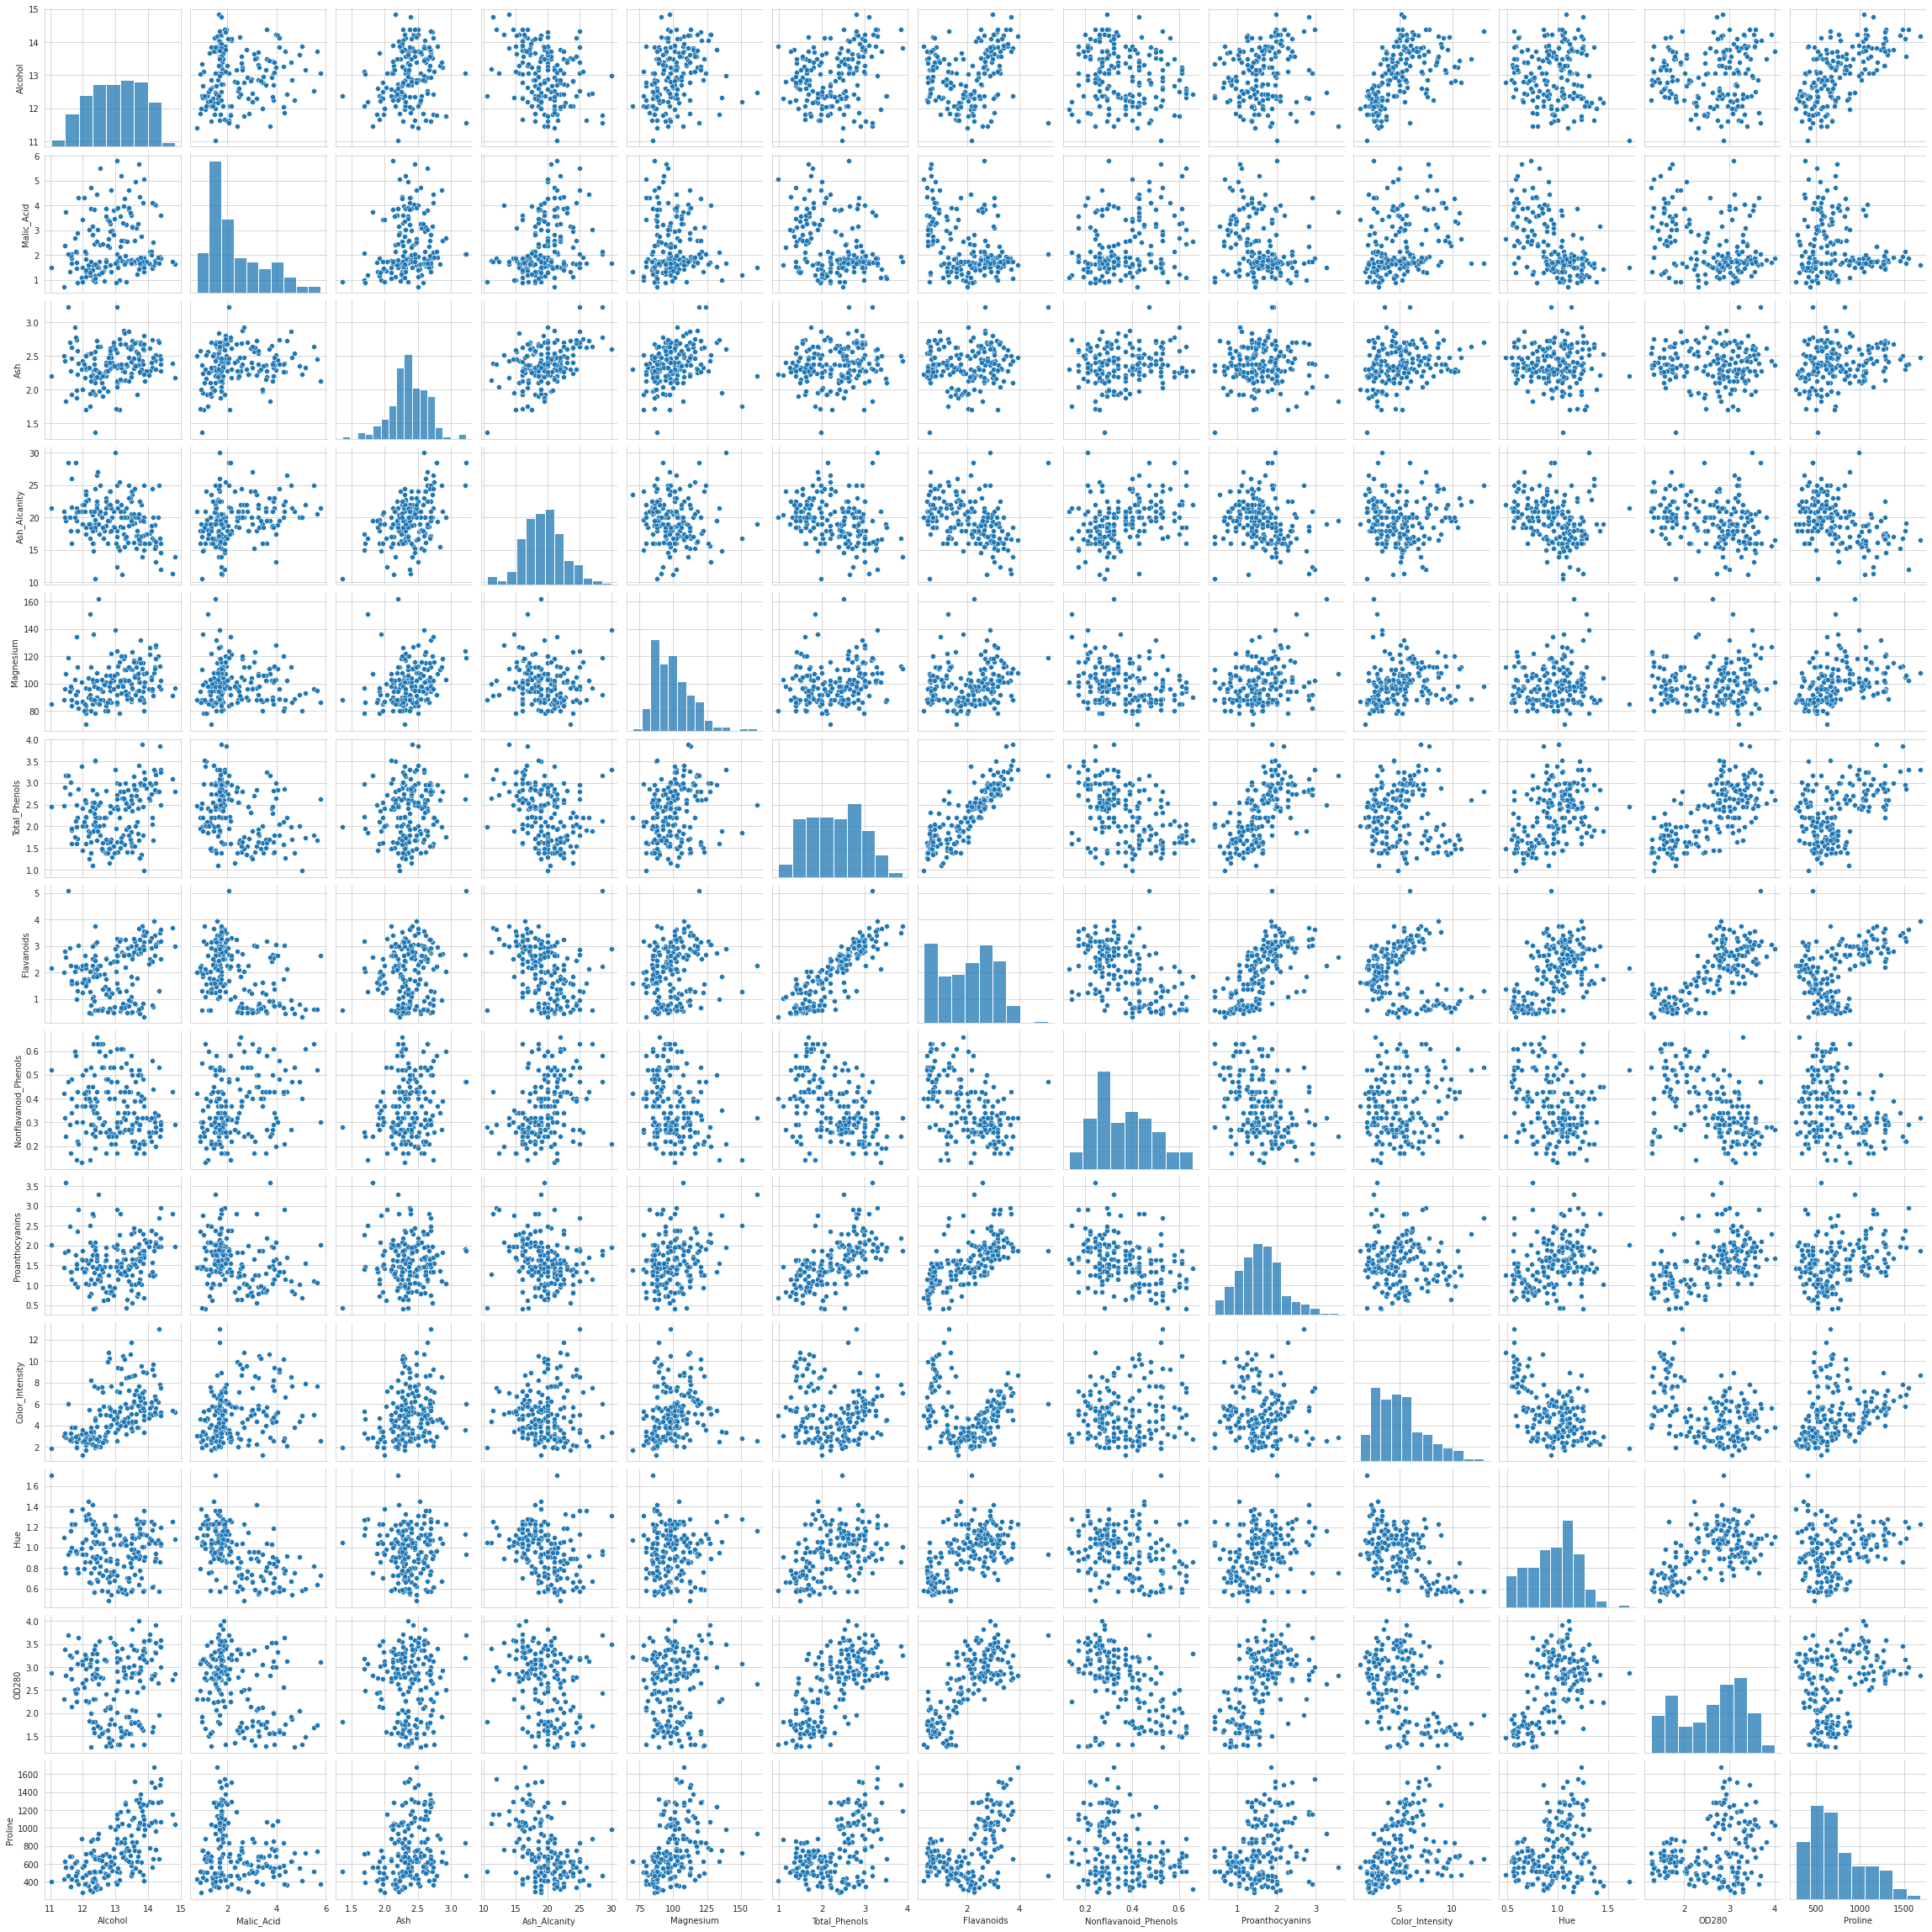

In [ ]:
sns.pairplot(df)

**Analysis**

From the above scatterplot we can get some interesting details. For some of the features, the distribution appears to be fairly linear. For some others, the distribution appears to be negatively skewed. 

So this confirms our initial suspicions — there are indeed some interesting co-dependencies between some of the features.

**Assignment 1 : 4. Make a boxplot for each feature and highlight the outlier, if any, then remove the outlier, make again box plot to show the outlier effect and write the inferences. [5]**

**Statistical Analysis(Outliers Detection)**

* While looking histogram as yok can see there are rare values in bening distribution 
* There values can be errors or rare events.
* These errors and rare events can be called outliers.

Alcohol                     AxesSubplot(0.125,0.71587;0.168478x0.16413)
Malic_Acid               AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Ash                      AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Ash_Alcanity             AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Magnesium                  AxesSubplot(0.125,0.518913;0.168478x0.16413)
Total_Phenols           AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Flavanoids              AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Nonflavanoid_Phenols    AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Proanthocyanins            AxesSubplot(0.125,0.321957;0.168478x0.16413)
Color_Intensity         AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Hue                     AxesSubplot(0.529348,0.321957;0.168478x0.16413)
OD280                   AxesSubplot(0.731522,0.321957;0.168478x0.16413)
Proline                       AxesSubplot(0.125,0.125;0.168478x0.16413)
dtype: object

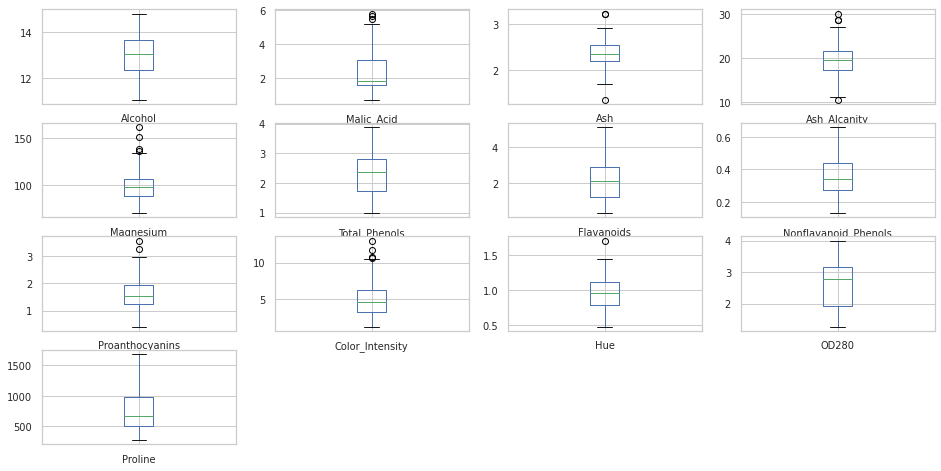

In [ ]:
df.plot(kind ='box',subplots = True, layout =(4,4),sharex = False)

**Enlarge version of Boxplot**

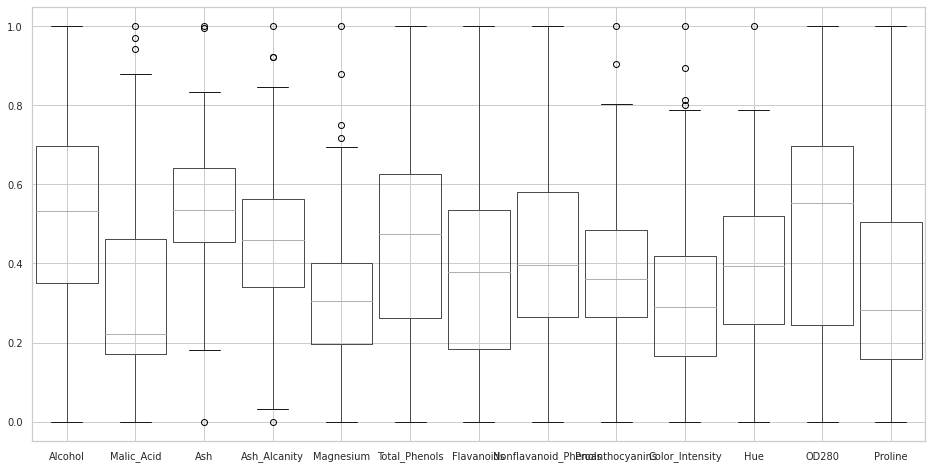

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df) 
df.loc[:,:] = scaled_values

sns.set(rc={'figure.figsize':(16,8)}, font_scale=0.9, style='whitegrid')
df.boxplot(widths = 0.9)

**Calculating outliers:**

* We calculate first quartile (Q1)(25%)
* then we find IQR(inter quartile range) = Q3-Q1
* finally compute Q1 - 1.5IQR and Q3 + 1.5IQR
* Anything outside this range is an outlier

In [ ]:
def IQR_OutlierRemoval(new_df):  
    Q1 = new_df.quantile(0.25)
    Q3 = new_df.quantile(0.75)
    IQR = Q3 - Q1

    new_df = new_df[~((new_df < (Q1 - 1.5 * IQR)) |(new_df > (Q3 + 1.5 * IQR))).any(axis=1)]

    return new_df
    # plt.show()

df2 = df.copy()

print(df2.shape)

(178, 13)


In [ ]:
df2 = IQR_OutlierRemoval(df2) #outlier removal
df2.shape

(161, 13)

**Boxplot after outlier removal**

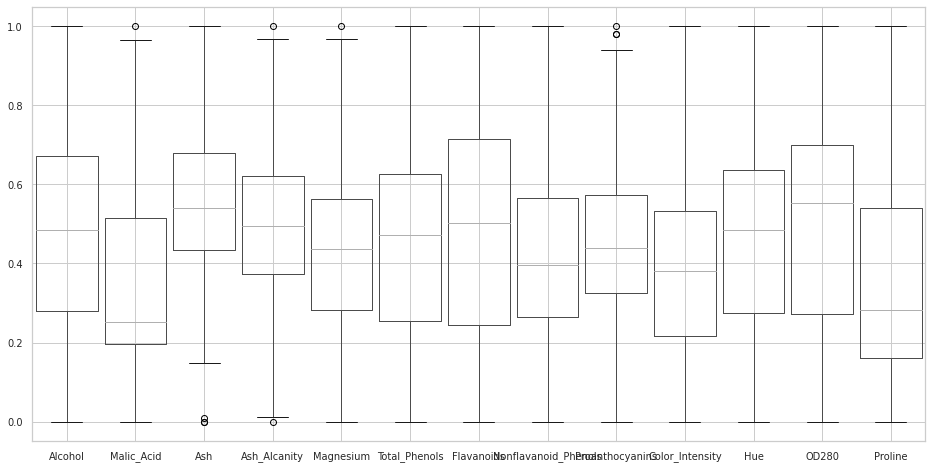

In [ ]:
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df2) 
df2.loc[:,:] = scaled_values

sns.set(rc={'figure.figsize':(16,8)}, font_scale=0.9, style='whitegrid')
df2.boxplot(widths = 0.9)

In boxplots we observe that as all the features varied in different ranges of the boxplot and its not readabale. we are using MinMaxScaler normalization made the boxplot clearly readable. This also makes comparision easier as all the features are distributed within 0 and 1

In [ ]:
df2.iloc[:, 0].values

array([0.8245614 , 0.52339181, 0.51169591, 0.86549708, 0.53508772,
       0.81578947, 0.87134503, 0.7748538 , 1.        , 0.71637427,
       0.78654971, 0.79239766, 0.68421053, 0.97660819, 0.86842105,
       0.64912281, 0.84502924, 0.70760234, 0.8128655 , 0.65204678,
       0.7748538 , 0.44444444, 0.67251462, 0.42105263, 0.61111111,
       0.57894737, 0.55263158, 0.71929825, 0.76315789, 0.67836257,
       0.63450292, 0.66374269, 0.6871345 , 0.61403509, 0.60526316,
       0.54678363, 0.47953216, 0.48538012, 0.82163743, 0.62865497,
       0.58479532, 0.72222222, 0.53508772, 0.47953216, 0.81871345,
       0.86842105, 0.72807018, 0.78654971, 0.73976608, 0.47953216,
       0.70760234, 0.70467836, 0.69005848, 0.68128655, 0.62865497,
       0.82163743, 0.5497076 , 0.6754386 , 0.26900585, 0.35964912,
       0.66081871, 0.28070175, 0.22222222, 0.28070175, 0.49707602,
       0.28070175, 0.56432749, 0.25730994, 0.71637427, 0.60818713,
       0.16081871, 0.07309942, 0.47368421, 0.12573099, 0.37719

In [ ]:
from sklearn.model_selection import train_test_split
X, y = df2.iloc[:, 1:].values, df2.iloc[:, 0].values
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
len(X_test), len(X_train)

(49, 112)

**Assignment 1 : 5. Normalized the data if required, and write a note for what, why and how you performed normalization.[5]**

**Normalization**

To normalize our data, we can apply the min-max scaling to each feature column, where the new value xnorm can be computed as below

Xnorm = (X - Xmin)/(Xmax -Xmin)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [ ]:
X_train_norm[0]

array([0.10465116, 0.16393443, 0.49324324, 0.29032258, 0.12727273,
       0.25722543, 0.30188679, 0.36862745, 0.0808656 , 0.56818182,
       0.56603774, 0.20256776])

In [ ]:
X_test_norm[0]

array([ 0.59069767,  0.24590164,  0.52702703,  0.27419355,  0.32727273,
        0.33815029,  0.45283019,  0.57254902, -0.0523918 ,  0.44318182,
        0.67169811,  0.20399429])

In [ ]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [ ]:
X_train_std[0]

array([-0.92036941, -1.88042012, -0.22938702, -0.78469448, -1.37574916,
       -0.74262854, -0.56225944, -0.46309137, -1.21899404,  0.36756837,
        0.15799327, -0.58319101])

In [ ]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score

**3. Perform at least five clustering methods with varying cluster sizes. Find correct cluster numbers for each method and show with line plot; how you finalized this cluster number. [5]**

**KMeans Clustering**

In [ ]:
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
kmeans_sil_score = [] # silhouette scores

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, init='k-means++').fit(X_train_std)
    clusters_inertia.append(kmeans.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(X_train_std, kmeans.labels_)
    kmeans_sil_score.append(silhouette_avg) # data for the silhouette score method

print(kmeans_sil_score)    

[0.31504412213688404, 0.3001258968804734, 0.24087217147181286, 0.21923465512312404, 0.18247422660165546, 0.16458253135916867, 0.1515305984513176, 0.1677371542633482, 0.15473245780512546]


**KMeans Clustering line graph**

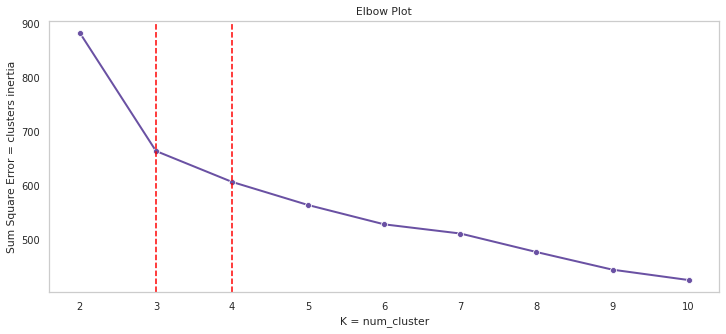



No clear "elbow" visible. A choice of 3 or 4 clusters seems to be fair. Lets see the silhouette score.


In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, clusters_inertia, marker='o', ax=ax, linewidth=2, color='#6A51A3')
ax.set_title("Elbow Plot")
ax.set_xlabel("K = num_cluster")
ax.set_ylabel("Sum Square Error = clusters inertia")
ax.axvline(3, ls="--", c="red")
ax.axvline(4, ls="--", c="red")
plt.grid()
plt.show()

print('\n')
print('No clear "elbow" visible. A choice of 3 or 4 clusters seems to be fair. Lets see the silhouette score.')

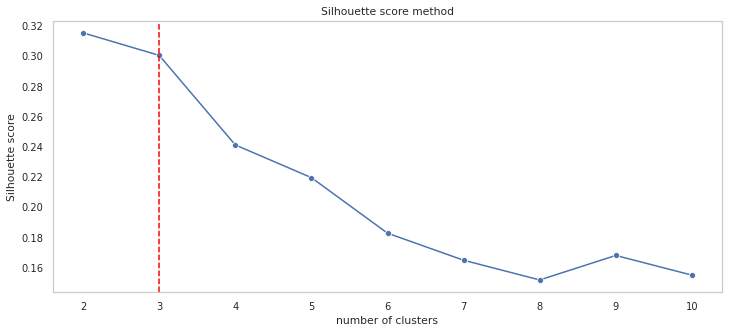

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, kmeans_sil_score, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(3, ls="--", c="red")
plt.grid()
plt.show()

**Analysis:** Best options would be respectively 3 or 4 clusters. Lets compare both.

**Cluster size = 3 :**

In [ ]:
KM_5_clusters = KMeans(n_clusters=3 , init='k-means++').fit(df2) # initialise and fit K-Means model

KM5_clustered = df2.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ # append labels to points

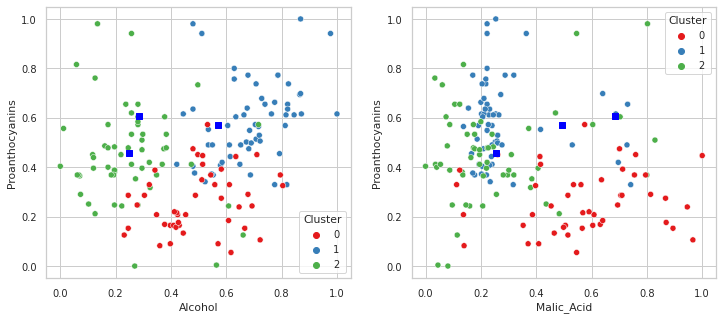

In [ ]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot('Alcohol', 'Proanthocyanins', data=KM5_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('Malic_Acid', 'Proanthocyanins', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

In [ ]:
KM_clust_sizes = KM5_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size = 3"]
KM_clust_sizes

,KM_size = 3
Cluster,
0,45
1,58
2,58


**Cluster size 2:**

**Affinity Propagation**

Applying Affinity Propagation clustering algorithm

In [ ]:
# Compute Affinity Propagation
# reading the csv file again as new as the original file has been modified before.

df3 = pd.read_csv("/content/wine-clustering.csv")

In [ ]:
n_clusters_ = []
preferences = range(-20000,-5000,100) # Range is arbitrarily chosen
ap_sil_score = [] # silouette scores

for i in preferences:
    ap = AffinityPropagation(preference=i, max_iter=200).fit(df3)
    n_clusters_.append((len(np.unique(ap.labels_))))
    ap_sil_score.append(silhouette_score(df3, ap.labels_))
    
ap_results = pd.DataFrame([preferences, n_clusters_, ap_sil_score], index=['preference','clusters', 'sil_score']).T
ap_results.sort_values(by='sil_score', ascending=False).head() # display only 5 best scores

,preference,clusters,sil_score
15,-18500.0,13.0,0.514210
9,-19100.0,13.0,0.513383
13,-18700.0,13.0,0.510948
3,-19700.0,13.0,0.510948
4,-19600.0,13.0,0.510948


We get the best preference i.e. -18500 which we will use. However to be sure we will plot silhouette score as follows. The highest Silhouette score can ensure the best hyperparameter value for clustering.

**Plotting silhoette score graph**

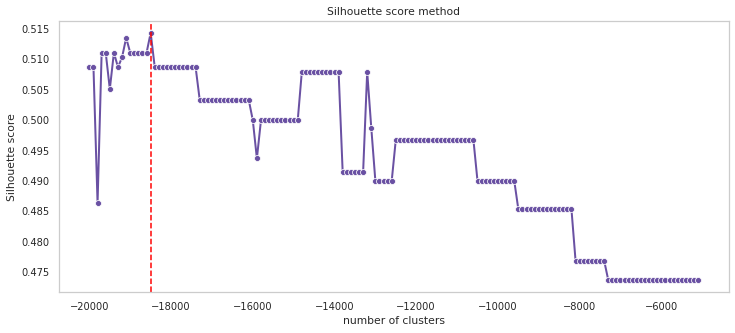

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(preferences, ap_sil_score, marker='o', ax=ax, linewidth=2, color='#6A51A3')
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(-18500, ls="--", c="red")
plt.grid()
plt.show()

Thus we get that preference should be taken as -18500. Now we will fit the model using this value.

In [ ]:
# To fit the model
ap = AffinityPropagation(preference=-18500).fit(df3)

In [ ]:
ap_clustered = df3.copy()
ap_clustered.loc[:,'Cluster'] = ap.labels_ # append labels to points
ap_clust_sizes = ap_clustered.groupby('Cluster').size().to_frame()
ap_clust_sizes.columns = ["Affinity Propagation Size"]
ap_clust_sizes

,Affinity Propagation Size
Cluster,
0,5
1,1
2,16
3,7
4,7
5,14
6,16
7,26
8,20


**Agglomerative Clustering:**

Applying Agglomerative Clustering algorithm

In [ ]:
df4 = df.copy()

# Normalizing the data before fitting the model
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df4) 
df4.loc[:,:] = scaled_values

# Running Agglomerative Clustering
nr_clusters = []
n_clusters = range(2, 10) # Range is arbitrarily chosen
ag_sil_score = [] # silouette scores

for p in n_clusters:
    ag = AgglomerativeClustering(n_clusters=p).fit(df4)
    nr_clusters.append((len(np.unique(ag.labels_))))
    ag_sil_score.append(silhouette_score(df4, ag.labels_))
    
results = pd.DataFrame([n_clusters, nr_clusters, ag_sil_score], index=['n_clusters','clusters', 'sil_score']).T
results.sort_values(by='sil_score', ascending=False).head() # display only 5 best scores

,n_clusters,clusters,sil_score
0,2.0,2.0,0.296668
1,3.0,3.0,0.294829
2,4.0,4.0,0.248703
7,9.0,9.0,0.212090
6,8.0,8.0,0.211014


**Plotting silhoette score**

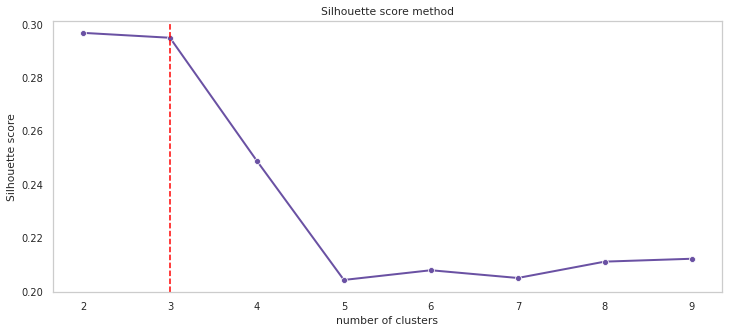

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, ag_sil_score, marker='o', ax=ax, linewidth=2, color='#6A51A3')
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(3, ls="--", c="red")
plt.grid()
plt.show()

Silhouette score model we observe that the optimum cluster number is 3

In [ ]:
# To fit the model
ag = AgglomerativeClustering(n_clusters=3).fit(df4)
ag_clustered = df4.copy()
ag_clustered.loc[:,'Cluster'] = ag.labels_ # append labels to points
ag_clust_sizes = ag_clustered.groupby('Cluster').size().to_frame()
ag_clust_sizes.columns = ["Agglomerative Clustering size"]
ag_clust_sizes

,Agglomerative Clustering size
Cluster,
0,71
1,50
2,57


**K-Means Ckusterring (with minibatch)**

Applying K-Means MiniBatch Clustering algorithm

In [ ]:
df5 = df.copy()
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
batchkmeans_sil_scores = [] # silhouette scores
df5 = pd.read_csv("/content/wine-clustering.csv")
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df5) 
df5.loc[:,:] = scaled_values


from sklearn.cluster import MiniBatchKMeans
for n in n_clusters:
    KM_est = MiniBatchKMeans(n_clusters=n, init='k-means++').fit(df5)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(df5, KM_est.labels_)
    batchkmeans_sil_scores.append(silhouette_avg) # data for the silhouette score method

**Plotting the Graph**

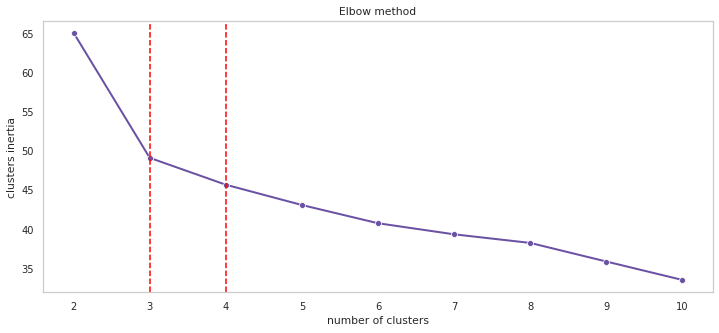

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, clusters_inertia, marker='o', ax=ax,linewidth=2, color='#6A51A3')
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
ax.axvline(3, ls="--", c="red")
ax.axvline(4, ls="--", c="red")
plt.grid()
plt.show()

**Plot for Silhouette score to find the optimum K**

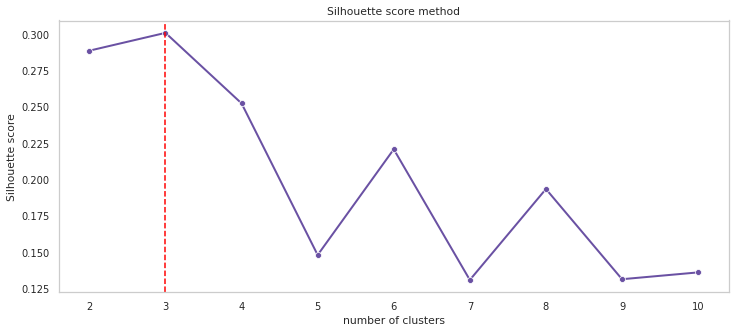

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, s_scores, marker='o', ax=ax,linewidth=2, color='#6A51A3')
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(3, ls="--", c="red")
plt.grid()
plt.show()

In [ ]:
# To initialize and fit K-Means model
KM_clusters_3 = MiniBatchKMeans(n_clusters=3 , init='k-means++').fit(df5)

# Making a copy of dataframe for ease
KM_clustered = df5.copy()

# append labels to points
KM_clustered.loc[:,'Cluster'] = KM_clusters_3.labels_ 

MiniKM_clust_sizes = KM_clustered.groupby('Cluster').size().to_frame()
MiniKM_clust_sizes.columns = ["MiniBatch KMeans Size"]
MiniKM_clust_sizes

,MiniBatch KMeans Size
Cluster,
0,60
1,66
2,52


In [ ]:
# We will be comparing all the clustering algorithms here.

clusters = pd.concat([KM_clust_sizes, ap_clust_sizes, ag_clust_sizes, MiniKM_clust_sizes],axis=1, sort=False)
clusters

,KM_size = 3,Affinity Propagation Size,Agglomerative Clustering size,MiniBatch KMeans Size
Cluster,,,,
0,45.0,5,71.0,60.0
1,58.0,1,50.0,66.0
2,58.0,16,57.0,52.0
3,NaN,7,NaN,NaN
4,NaN,7,NaN,NaN
5,NaN,14,NaN,NaN
6,NaN,16,NaN,NaN
7,NaN,26,NaN,NaN
8,NaN,20,NaN,NaN


**5. Do steps 3 and 4 again after dimension reduction, and show whether it is helpful; if not, why? [5]**

Implementing Principal Component Analysis (PCA) to perform dimensionality reduction:

In [ ]:
# Before performing PCA, its good to ge the dataframe standardized
from sklearn import preprocessing
df7 = pd.read_csv("/content/wine-clustering.csv")
scaler = preprocessing.StandardScaler().fit(df7)
df7 = scaler.transform(df7)

**Principal Component Analysis (PCA)**

In [ ]:
from sklearn.decomposition import PCA

# Initializing an instance of PCA class
pc = PCA() 

# To apply PCA upon the predictor variables
results = pc.fit(df7) 

# getting an array of latent variables
Z = results.transform(df7) 

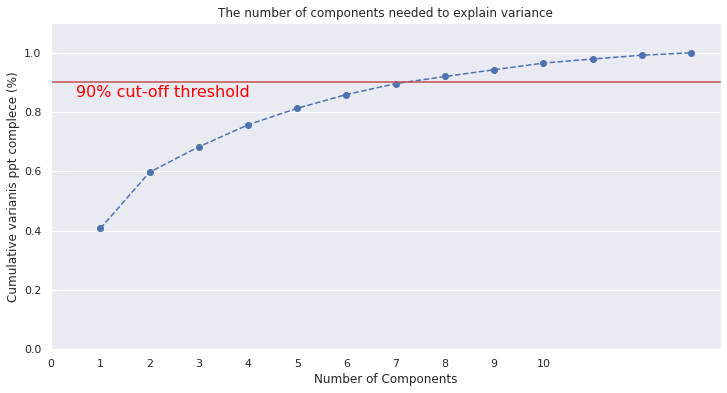

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(df7)

pca = PCA().fit(data_rescaled)

% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 14, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative varianis ppt complece (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

Above screen plot shows the variances explained by each latent variable. The 1st component explains approx. 35% of the variance in the whole dataset.

Elbow shape in order to decide which PCS to keep and which ones to discard.Most of the time, we use enough PCS so that they explain 95% to 99% of the variation in the data.

By examining the above figure, we can conclude that first 6 variables contain most of the information.

In [ ]:
from sklearn.decomposition import PCA
pca_r = PCA(7)
pca_r_result = pca_r.fit_transform(data_rescaled)

In [ ]:
# To put the component (PCA coefficients) into a data frame
# The below is the coefficient matrix.
pd.DataFrame(pca.components_) 

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.133368,0.248516,-0.000739,0.177839,-0.088657,-0.395071,-0.414590,0.333109,-0.252902,0.092329,-0.251137,-0.473492,-0.286862
1,-0.550884,-0.227391,-0.163091,0.079776,-0.188166,-0.074145,-0.001007,-0.009960,-0.031418,-0.519707,0.237206,0.215562,-0.443888
2,-0.083848,0.492039,0.403009,0.477242,0.006551,0.253065,0.196105,0.285982,0.228342,-0.033100,-0.106589,0.297776,-0.151968
3,-0.040328,0.486032,-0.241976,-0.081694,0.015880,-0.052643,-0.027033,-0.709095,0.076574,-0.026322,-0.352498,0.082062,-0.229793
4,-0.278010,-0.412890,0.286394,0.418305,0.470899,-0.018030,0.002573,-0.360038,0.148666,0.200582,-0.077162,-0.263396,-0.076556
5,-0.137254,-0.213103,-0.300965,-0.135610,-0.312519,0.283604,0.147045,0.197232,0.503115,0.388032,-0.283041,-0.167278,-0.276349
6,-0.275352,0.310302,-0.171805,-0.297556,0.520419,-0.066524,-0.050698,0.214889,0.466207,-0.212596,0.193315,-0.224561,0.188372
7,0.555031,-0.076928,-0.123460,0.270756,-0.019937,-0.413384,-0.156461,-0.034232,0.483470,-0.036924,0.295372,0.102303,-0.260229
8,0.326687,-0.014471,-0.044362,-0.204924,0.471910,0.351232,0.088960,0.122889,-0.284054,-0.023708,0.068775,-0.060197,-0.624839
9,-0.035912,-0.237073,-0.056899,-0.132503,0.325868,-0.263006,-0.199445,0.236775,0.018743,0.039143,-0.534248,0.602194,0.023829


In [ ]:
# Putting names on columns manually as column named 0, 1 and so on made less sense.

pd.DataFrame(pca_r_result[:,:6], columns=list(
[u'Alcohol', u'Malic_Acid', u'Ash', u'Ash_Alcanity', u'Magnesium', u'Total_Phenols'])).head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols
0,-0.706336,-0.253193,0.024093,0.013263,-0.026580,-0.074364
1,-0.484977,-0.008823,-0.280482,0.075898,-0.238634,-0.071877
2,-0.521172,-0.189187,0.196217,-0.015784,0.045045,0.087116
3,-0.821644,-0.580906,0.081110,0.012235,-0.004805,0.081987
4,-0.202546,-0.059467,0.300240,-0.102051,0.105777,-0.116790
5,-0.608190,-0.487519,-0.075433,-0.184152,-0.068730,0.027011
6,-0.544047,-0.300196,-0.105075,-0.043006,-0.239967,-0.097480
7,-0.474357,-0.298197,-0.002821,-0.086235,-0.069381,-0.348479
8,-0.500432,-0.307603,-0.230494,-0.024397,-0.219723,0.059622
9,-0.627518,-0.206328,-0.114148,0.059695,-0.049682,0.089690


We have the 6 columns that contain majority of the information needed, we will apply clustering algorithm to the dataframe and see if reducing dimensionality actually happens.

**Applying KMeans clustering after PCA**

In [ ]:
## KMeans clustering with cluster size = 3

dfvar = pd.DataFrame(pca_r_result[:,:6], columns=list(
[u'Alcohol', u'Malic_Acid', u'Ash', u'Ash_Alcanity', u'Magnesium', u'Total_Phenols'])) #Assigning the dataframe to a var named dfvar
KM_3_clusters = KMeans(n_clusters=3 , init='k-means++').fit(dfvar) # initialise and fit K-Means model

KM3_clustered = dfvar.copy()
KM3_clustered.loc[:,'Cluster'] = KM_3_clusters.labels_ # append labels to points

In [ ]:
KM_clust_sizes = KM3_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size = 3 Size After PCA"]
KM_clust_sizes

,KM_size = 3 Size After PCA
Cluster,
0,65
1,52
2,61


**Applying Agglomerative Clustering clustering after PCA**

In [ ]:
# Running Agglomerative Clustering
dfvar = pd.DataFrame(pca_r_result[:,:6], columns=list(
[u'Alcohol', u'Malic_Acid', u'Ash', u'Ash_Alcanity', u'Magnesium', u'Total_Phenols']))


no_of_clusters = []
n_clusters = range(2, 10) # Range is arbitrarily chosen
ag_sil_score = [] # silouette scores

for p in n_clusters:
    ag = AgglomerativeClustering(n_clusters=p).fit(dfvar)
    no_of_clusters.append((len(np.unique(ag.labels_))))
    ag_sil_score.append(silhouette_score(dfvar, ag.labels_))
    
results = pd.DataFrame([n_clusters, no_of_clusters, ag_sil_score], index=['n_clusters','clusters', 'sil_score']).T
results.sort_values(by='sil_score', ascending=False).head() # display only 5 best scores

,n_clusters,clusters,sil_score
1,3.0,3.0,0.328477
0,2.0,2.0,0.325491
2,4.0,4.0,0.279820
3,5.0,5.0,0.262047
4,6.0,6.0,0.260523


In [ ]:
# To fit the model
ag = AgglomerativeClustering(n_clusters=3).fit(dfvar)
ag_clustered = dfvar.copy()
ag_clustered.loc[:,'Cluster'] = ag.labels_ # append labels to points
ag_clust_sizes = ag_clustered.groupby('Cluster').size().to_frame()
ag_clust_sizes.columns = ["Agglomerative Clustering size after PCA"]
ag_clust_sizes

,Agglomerative Clustering size after PCA
Cluster,
0,73
1,49
2,56


**Applying MiniBatch KMeans Clustering after PCA**

In [ ]:
dfvar = pd.DataFrame(pca_r_result[:,:6], columns=list(
[u'Alcohol', u'Malic_Acid', u'Ash', u'Ash_Alcanity', u'Magnesium', u'Total_Phenols']))

n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores


from sklearn.cluster import MiniBatchKMeans
for n in n_clusters:
    KM_est = MiniBatchKMeans(n_clusters=n, init='k-means++').fit(dfvar)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(dfvar, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

In [ ]:
# To initialize and fit K-Means model
KM_3_clusters = MiniBatchKMeans(n_clusters=3 , init='k-means++').fit(dfvar)

# Making a copy of dataframe for ease
KM3_clustered = dfvar.copy()

# append labels to points
KM3_clustered.loc[:,'Cluster'] = KM_3_clusters.labels_ 

MiniKM_clust_sizes = KM3_clustered.groupby('Cluster').size().to_frame()
MiniKM_clust_sizes.columns = ["MiniBatch KMeans Size after PCA"]
MiniKM_clust_sizes

,MiniBatch KMeans Size after PCA
Cluster,
0,65
1,52
2,61


**Comparing the two clustering algorithms post PCA**

In [ ]:
clustersPCA = pd.concat([KM_clust_sizes, ag_clust_sizes, MiniKM_clust_sizes],axis=1, sort=False)
clustersPCA

,KM_size = 3 Size After PCA,Agglomerative Clustering size after PCA,MiniBatch KMeans Size after PCA
Cluster,,,
0,65,73,65
1,52,49,52
2,61,56,61


**What we got before applying Principal Component Analysis:**

In [ ]:
clusters.head(3)

,KM_size = 3,Affinity Propagation Size,Agglomerative Clustering size,MiniBatch KMeans Size
Cluster,,,,
0,45.0,5,71.0,60.0
1,58.0,1,50.0,66.0
2,58.0,16,57.0,52.0


**Final Consulsion:**

From the above 2 tables we observed that after clustering and performing dimentioanlity reduction appears to be better than that without PCA. 

**We got a better & consistent clustering with PCA.**